In [1]:
# [More advanced plotting with Pandas/Matplotlib — Geo-Python site documentation](https://geo-python.github.io/site/notebooks/L7/advanced-plotting.html)
# https://geo-python.github.io/site/notebooks/L7/advanced-plotting.html

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import pandas_bokeh

plt.rcParams['figure.figsize'] = [12,6]

custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)



In [3]:
fp = r"data/029740.txt"

data = pd.read_csv(fp, delim_whitespace=True,
                   na_values=["*","**","***","****","*****","******",],
                   usecols=['YR--MODAHRMN', 'TEMP', 'MAX', 'MIN'],
                   parse_dates=['YR--MODAHRMN'], index_col='YR--MODAHRMN')

print("Number of rows: ", len(data))
new_names = {'TEMP': 'TEMP_F'}
data = data.rename(columns=new_names)

Number of rows:  931767


In [4]:
print('Number of no data values per column: ')
print(data.isna().sum())

Number of no data values per column: 
TEMP_F      3579
MAX       900880
MIN       900896
dtype: int64


In [5]:
data.dropna(subset=['TEMP_F'], inplace=True)
print("Number of rows after removing no data values:", len(data))

Number of rows after removing no data values: 928188


In [6]:
print(data.isna().sum())

TEMP_F         0
MAX       897339
MIN       897319
dtype: int64


In [7]:
data["TEMP_C"] = (data["TEMP_F"] - 32.0) / 1.8

In [8]:
data.head()

,TEMP_F,MAX,MIN,TEMP_C
YR--MODAHRMN,,,,
1952-01-01 00:00:00,36.0,NaN,NaN,2.222222
1952-01-01 06:00:00,37.0,NaN,34.0,2.777778
1952-01-01 12:00:00,39.0,NaN,NaN,3.888889
1952-01-01 18:00:00,36.0,39.0,NaN,2.222222
1952-01-02 00:00:00,36.0,NaN,NaN,2.222222


In [9]:
winter = data.loc[(data.index >= '201212010000') & (data.index < '201303010000')]
winter_temps = winter['TEMP_C']

spring = data.loc[(data.index >= '201303010000') & (data.index < '201306010000')]
spring_temps = spring['TEMP_C']

summer = data.loc[(data.index >= '201306010000') & (data.index < '201309010000')]
summer_temps = summer['TEMP_C']

autumn = data.loc[(data.index >= '201309010000') & (data.index < '201312010000')]
autumn_temps = autumn['TEMP_C']

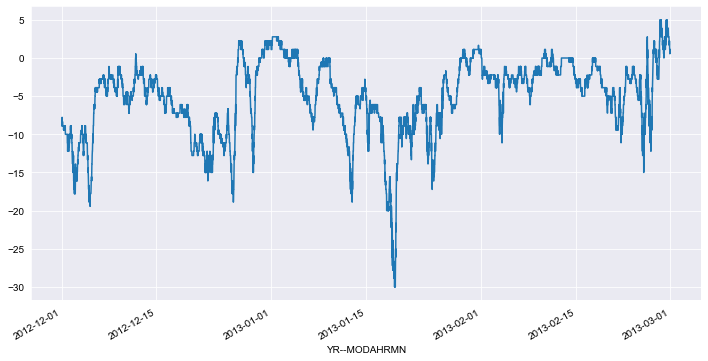

In [13]:
ax1 = winter_temps.plot()

In [14]:
help(winter_temps.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'pie' : pie plot
 |      - 'sc

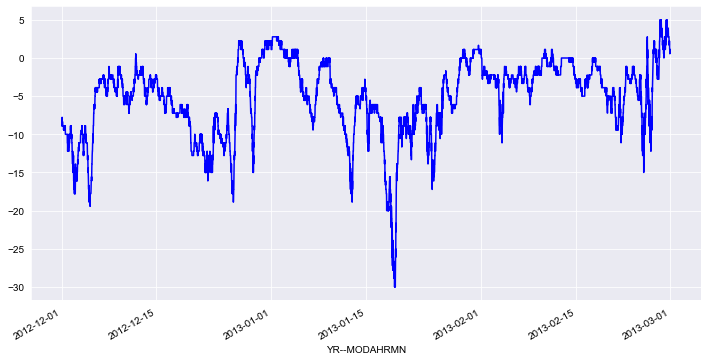

In [15]:
winter_temps.plot(color='blue')

In [16]:
min_temp = min(winter_temps.min(), spring_temps.min(), summer_temps.min(), autumn_temps.min())
min_temp = min_temp - 5.0
max_temp = max(winter_temps.max(), spring_temps.max(), summer_temps.max(), autumn_temps.max())
max_temp = max_temp + 5.0

print("Min: ", min_temp, "Max: ", max_temp)

Min:  -35.0 Max:  35.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1264d3400>,
      dtype=object)

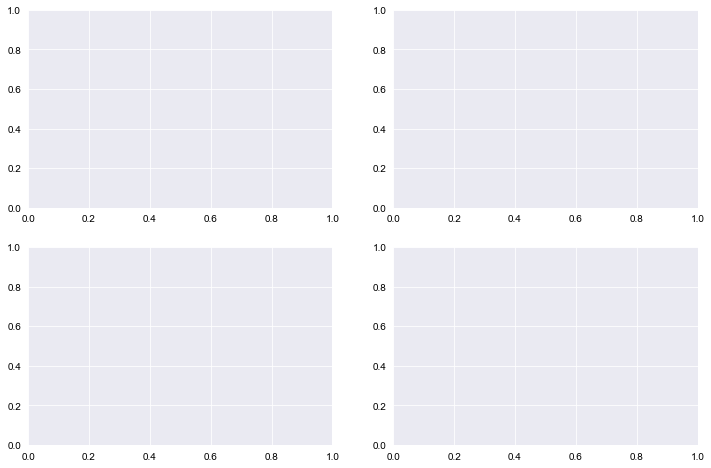

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8));
axes

In [18]:
ax11 = axes[0][0]
ax12 = axes[0][1]
ax21 = axes[1][0]
ax22 = axes[1][1]

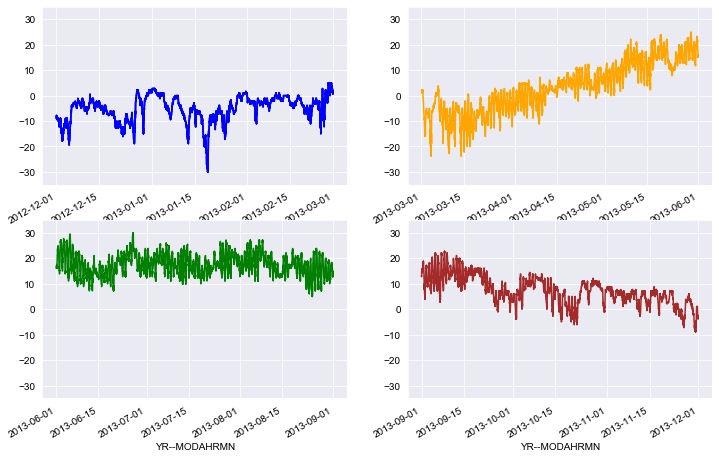

In [22]:
# set plot line width
line_width = 1.5

# winter_temps.subplot(ax11)
# winter_temps.plot()
# summer_temps.plot()

# plot data
winter_temps.plot(ax=ax11, c='blue', lw=line_width, ylim=[min_temp, max_temp])
spring_temps.plot(ax=ax12, c='orange', lw=line_width, ylim=[min_temp, max_temp])
summer_temps.plot(ax=ax21, c='green', lw=line_width, ylim=[min_temp, max_temp])
autumn_temps.plot(ax=ax22, c='brown', lw=line_width, ylim=[min_temp, max_temp])

# display
fig

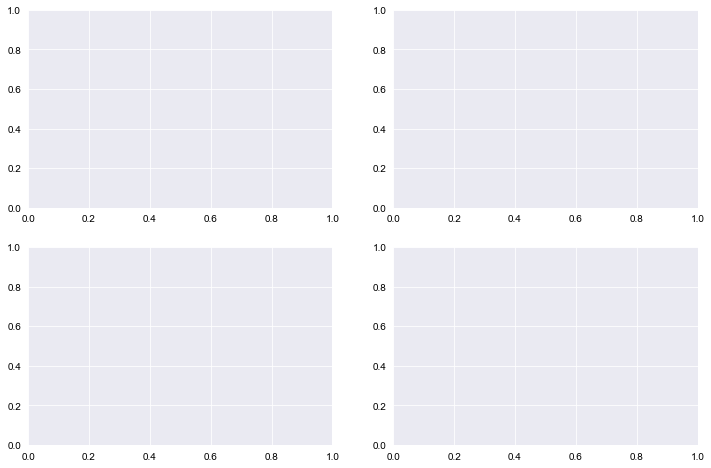

In [23]:
# create the new figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

# rename the axes for ease of use
ax11 = axes[0][0]
ax12 = axes[0][1]
ax21 = axes[1][0]
ax22 = axes[1][1]


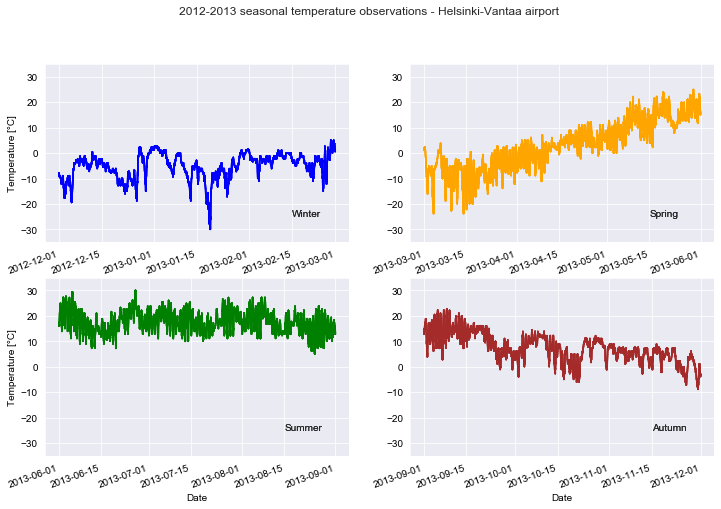

In [27]:
line_width = 1.5

# plot data
winter_temps.plot(ax=ax11, c='blue', lw=line_width, ylim=[min_temp, max_temp], grid=True)
spring_temps.plot(ax=ax12, c='orange', lw=line_width, ylim=[min_temp, max_temp], grid=True)
summer_temps.plot(ax=ax21, c='green', lw=line_width, ylim=[min_temp, max_temp], grid=True)
autumn_temps.plot(ax=ax22, c='brown', lw=line_width, ylim=[min_temp, max_temp], grid=True)

# set figure title
fig.suptitle('2012-2013 seasonal temperature observations - Helsinki-Vantaa airport')

# rotate the x-axis labels so they don't overlap
plt.setp(ax11.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax12.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax21.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax22.xaxis.get_majorticklabels(), rotation=20)

# Axis labels
ax21.set_xlabel('Date')
ax22.set_xlabel('Date')
ax11.set_ylabel('Temperature [°C]')
ax21.set_ylabel('Temperature [°C]')

# season label text
ax11.text(pd.to_datetime('20130215'), -25, 'Winter')
ax12.text(pd.to_datetime('20130515'), -25, 'Spring')
ax21.text(pd.to_datetime('20130815'), -25, 'Summer')
ax22.text(pd.to_datetime('20131115'), -25, 'Autumn')

# display
fig